<a href="https://colab.research.google.com/github/rajim0112/GitHubDemo/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/car_data.csv")
df = pd.DataFrame(data)
print(df)

     User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]


In [ ]:
# Drop User ID as it's not relevant
df = df.drop(columns=['User ID'])

# Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Split data
X = df[['Gender', 'Age', 'AnnualSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.90


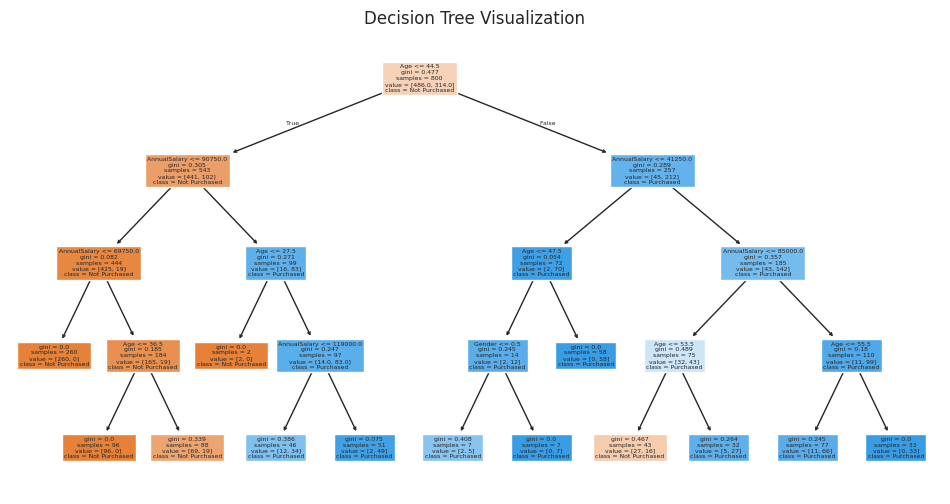

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=['Gender', 'Age', 'AnnualSalary'], class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

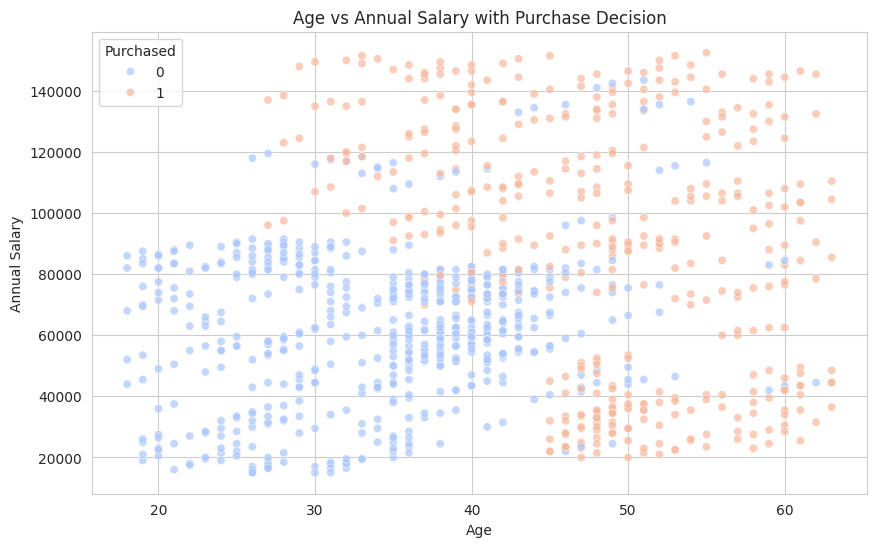

In [ ]:
# Plot data distribution with Seaborn whitegrid
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['AnnualSalary'], hue=df['Purchased'], palette='coolwarm', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Age vs Annual Salary with Purchase Decision')
plt.show()